# Question 1

In [1]:
import pandas as pd

In [21]:
users = pd.read_csv('user.csv', sep = "|")
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [20]:
average_age = users.groupby("occupation")["age"].mean()
average_age

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [39]:
male_ratio = users[users.gender == "M"].groupby("occupation")["gender"].count()
male_ratio.sort_values(ascending=False)

occupation
student          136
educator          69
other             69
engineer          65
programmer        60
administrator     43
executive         29
scientist         28
technician        26
writer            26
librarian         22
marketing         16
entertainment     16
artist            15
retired           13
lawyer            10
salesman           9
doctor             7
healthcare         5
none               5
homemaker          1
Name: gender, dtype: int64

In [66]:
min_age = users.groupby("occupation")["age"].min()
min_age = min_age.rename('Minimum Age')

max_age = users.groupby("occupation")["age"].max()
max_age = max_age.rename('Maximum Age')

min_max_age = pd.concat([min_age, max_age], axis=1)
min_max_age

,Minimum Age,Maximum Age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [69]:
occupation_sex = users.groupby(["occupation", "gender"])["age"].mean()
occupation_sex

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [77]:
gender_percent = users.groupby(["occupation", "gender"]).agg({"gender" : "count"})
gender_percent.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

gender
occupation    gender            
administrator F        45.569620
              M        54.430380
artist        F        46.428571
              M        53.571429
doctor        M       100.000000
educator      F        27.368421
              M        72.631579
engineer      F         2.985075
              M        97.014925
entertainment F        11.111111
              M        88.888889
executive     F         9.375000
              M        90.625000
healthcare    F        68.750000
              M        31.250000
homemaker     F        85.714286
              M        14.285714
lawyer        F        16.666667
              M        83.333333
librarian     F        56.862745
              M        43.137255
marketing     F        38.461538
              M        61.538462
none          F        44.444444
              M        55.555556
other         F        34.285714
              M        65.714286
programmer    F         9.090909
              M        90.909091
retired       F         7.142857
              M        92.857143
salesman      F        25.000000
              M        75.000000
scientist     F         9.677419
              M        90.322581
student       F        30.612245
              M        69.387755
technician    F         3.703704
              M        96.296296
writer        F        42.222222
              M        57.777778

# QUESTION 2

In [1]:
import pandas as pd

In [2]:
euro12 = pd.read_csv("Euro_2012_stats_TEAM.csv")
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [5]:
goal = euro12[["Team","Goals"]]
goal

,Team,Goals
0,Croatia,4
1,Czech Republic,4
2,Denmark,4
3,England,5
4,France,3
5,Germany,10
6,Greece,5
7,Italy,6
8,Netherlands,2
9,Poland,2


In [7]:
team_size = euro12["Team"].count()
team_size

16

In [13]:
cols = euro12.columns
print("There are", cols.size, "columns")

There are 35 columns


In [14]:
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [16]:
discipline.sort_values(by = ["Red Cards", "Yellow Cards"], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [17]:
mean_yellow = discipline["Yellow Cards"].mean()
print("The mean yellow card per team is", mean_yellow)

The mean yellow card per team is 7.4375


In [31]:
#Teams who scored more than 6 goals
euro12[euro12.Goals > 6][["Team", "Goals"]]

,Team,Goals
5,Germany,10
13,Spain,12


In [33]:
#Countries that startwith G
euro12[euro12.Team.str.startswith('G')]["Team"]

5    Germany
6     Greece
Name: Team, dtype: object

In [38]:
#The first seven columns
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [39]:
#All colums except the last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [49]:
#Shooting Accuracy for England, Italy and Russia
teams = euro12[(euro12.Team == "England") | (euro12.Team == "Italy") | (euro12.Team == "Russia")]
accuracy = teams[["Team","Shooting Accuracy"]]
accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [8]:
import pandas as pd
import numpy as np
import random

In [19]:
first  = pd.Series([np.random.randint(1,4) for i in range(100)])
second = pd.Series([np.random.randint(1,3) for i in range(100)])
third  = pd.Series([np.random.randint(10_000,30_000) for i in range(100)])

In [48]:
#Join the series
df = pd.concat([first, second, third], axis = 1)
df

,0,1,2
0,3,1,17467
1,2,2,20490
2,1,1,26663
3,3,2,11971
4,2,1,10009
...,...,...,...
95,3,1,22113
96,1,1,20511
97,3,2,13523
98,3,1,23978


In [49]:
#rename colums
df = df.rename({0 : "bedrs", 1 : "bathrs", 2 : "price_sqr_meter"}, axis = 1)
df

,bedrs,bathrs,price_sqr_meter
0,3,1,17467
1,2,2,20490
2,1,1,26663
3,3,2,11971
4,2,1,10009
...,...,...,...
95,3,1,22113
96,1,1,20511
97,3,2,13523
98,3,1,23978


In [50]:
#One column dataframe
bigcolumn = first.append([second, third])
bigcolumn

0         3
1         2
2         1
3         3
4         2
      ...  
95    22113
96    20511
97    13523
98    23978
99    15395
Length: 300, dtype: int64

In [52]:
#Reindex bigcolumn
bigcolumn.index = range(300)
bigcolumn

0          3
1          2
2          1
3          3
4          2
       ...  
295    22113
296    20511
297    13523
298    23978
299    15395
Length: 300, dtype: int64

# Question 4

In [15]:
import pandas as pd
from datetime import datetime, timedelta

In [59]:
data = pd.read_csv("wind.txt", sep = " ", parse_dates=[["Yr", "Mo","Dy"]])
data[:5]

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


In [60]:
def fixdate(date): #minus fifty years
    return date - timedelta(days = 365 * 50)
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fixdate)
data.index = data['Yr_Mo_Dy']
data[:5]

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,,
2011-01-14,2011-01-14,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2011-01-15,2011-01-15,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2011-01-16,2011-01-16,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


In [61]:
missing_values = data.isnull().sum().sum()
missing_values

3

In [62]:
total_values = data.notnull().sum().sum()
total_values

36

In [63]:
#Mean windspeed
data.iloc[:, 1:].mean().mean()

12.053333333333333

In [64]:
#Stats for each location
locs = data.iloc[:, 1:]
loc_stats = pd.concat([locs.min(), locs.max(), locs.mean(), locs.std()], axis = 1)
loc_stats = loc_stats.rename({0: "Minimum", 1 : "Maximum", 2 : "Mean", 3 : "Standard Deviation"}, axis = 1)
loc_stats

,Minimum,Maximum,Mean,Standard Deviation
RPT,14.71,18.50,16.083333,2.099389
VAL,14.96,16.88,15.920000,1.357645
ROS,10.83,13.17,12.110000,1.185411
KIL,6.50,10.13,8.640000,1.900289
SHA,11.17,12.62,11.895000,1.025305
BIR,6.17,9.87,7.903333,1.861003
DUB,11.25,13.67,12.140000,1.330902
CLA,10.04,10.25,10.145000,0.148492
MUL,8.50,10.83,9.706667,1.167233
CLO,7.67,12.58,9.973333,2.469015


In [67]:
#Stats for each day
locs = data.iloc[:, 1:]
day_stats = pd.concat([locs.min(axis = 1), locs.max(axis = 1), locs.mean(axis = 1), locs.std(axis = 1)], axis = 1)
day_stats = loc_stats.rename({0: "Minimum", 1 : "Maximum", 2 : "Mean", 3 : "Standard Deviation"}, axis = 1)
day_stats

,Minimum,Maximum,Mean,Standard Deviation
Yr_Mo_Dy,,,,
2011-01-14,9.29,18.50,13.018182,2.808875
2011-01-15,6.50,17.54,11.336364,3.188994
2011-01-16,6.17,18.50,11.641818,3.681912


In [79]:
#Average wind in January
jan = data[data.Yr_Mo_Dy.dt.month == 1].mean()
jan

RPT    16.083333
VAL    15.920000
ROS    12.110000
KIL     8.640000
SHA    11.895000
BIR     7.903333
DUB    12.140000
CLA    10.145000
MUL     9.706667
CLO     9.973333
BEL    16.263333
MAL    13.860000
dtype: float64

In [81]:
yearly_sample = data.resample("Y").mean()
yearly_sample

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
2011-12-31,16.083333,15.92,12.11,8.64,11.895,7.903333,12.14,10.145,9.706667,9.973333,16.263333,13.86


In [82]:
monthly_sample = data.resample("M").mean()
monthly_sample

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
2011-01-31,16.083333,15.92,12.11,8.64,11.895,7.903333,12.14,10.145,9.706667,9.973333,16.263333,13.86


In [83]:
daily_sample = data.resample("D").mean()
daily_sample

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
2011-01-14,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2011-01-15,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2011-01-16,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


In [87]:
weekly  = data.iloc[:, 1:].resample("W")
weekdata = pd.concat([weekly.min(), weekly.max(), weekly.mean()])
weekdata

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
2011-01-16,14.710000,14.96,10.83,6.50,11.170,6.170000,11.25,10.040,8.500000,7.670000,12.750000,12.71
2011-01-16,18.500000,16.88,13.17,10.13,12.620,9.870000,13.67,10.250,10.830000,12.580000,18.500000,15.04
2011-01-16,16.083333,15.92,12.11,8.64,11.895,7.903333,12.14,10.145,9.706667,9.973333,16.263333,13.86


# Question 5

In [3]:
import pandas as pd

In [4]:
chipo = pd.read_csv("chipotle.tsv", sep = "\t")
chipo[:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [7]:
#Number of observations
chipo.size

23110

In [9]:
#Number of columns
chipo.columns.size

5

In [10]:
#Column names
for col in chipo.columns:
    print(col)

order_id
quantity
item_name
choice_description
item_price


In [12]:
#indexs
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [28]:
#The most ordered item
items = chipo.groupby("item_name").agg({"quantity" : "sum"})
items.sort_values(by = "quantity", ascending = False)[:1]

,quantity
item_name,
Chicken Bowl,761


In [7]:
#Most ordered item in choice description
items = chipo.groupby("choice_description").agg({"quantity" : "sum"})
items.sort_values(by = "quantity", ascending = False)[:1]

,quantity
choice_description,
[Diet Coke],159


In [8]:
#The total items ordered
chipo["quantity"].sum()

4972

In [5]:
data = chipo.astype({'item_price': 'float'})

ValueError: could not convert string to float: '$2.39 '

In [11]:
data = chipo["item_price"].apply(lambda x : float(x[1:]))
data.dtypes

dtype('float64')

In [44]:
revenue = data.sum()
revenue

34500.16

In [48]:
#How many orders
orders = chipo.groupby("order_id").count().size
orders

7336

In [49]:
#Average revenue per order
revenue / orders

4.702857142857144

In [62]:
#How many different items are sold
chipo["item_name"].unique().size

50

# Question 6

In [1]:
import pandas as pd

In [20]:
df = pd.read_csv("us-marriages-divorces-1867-2014.csv")
df[:5]

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


Text(0.5, 0, 'Year : 1867-2014')

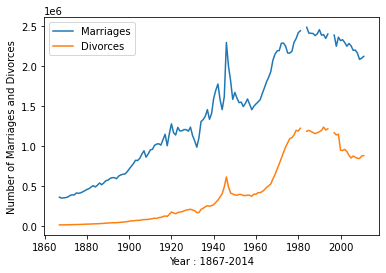

In [19]:
line = df.plot.line(x = 'Year', y = ['Marriages', 'Divorces'])
line.set_ylabel("Number of Marriages and Divorces")
line.set_xlabel("Year : 1867-2014")

# Question 7

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("us-marriages-divorces-1867-2014.csv")
df[:5]

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [5]:
data = df[(df.Year == 1900) | (df.Year == 1950) | (df.Year == 2000)]
data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


Text(0.5, 0, 'Years')

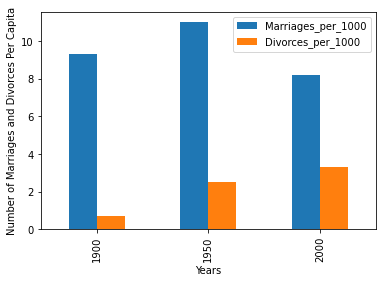

In [8]:
line = data.plot.bar(x = 'Year', y = ['Marriages_per_1000', 'Divorces_per_1000'])
line.set_ylabel("Number of Marriages and Divorces Per Capita")
line.set_xlabel("Years")

# Question 8

In [1]:
import pandas as pd

In [17]:
df = pd.read_csv("actor_kill_counts.csv")
df = df.sort_values(by = "Count", ascending = False)
df

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
7,Sylvester Stallone,267
4,Dolph Lundgren,239
8,Tomisaburo Wakayama,226
2,Clint Eastwood,207
6,Nicolas Cage,204
5,Jet Li,201
3,Clive Owen,194
9,Wesley Snipes,193


Text(0.5, 0, 'Number of kills')

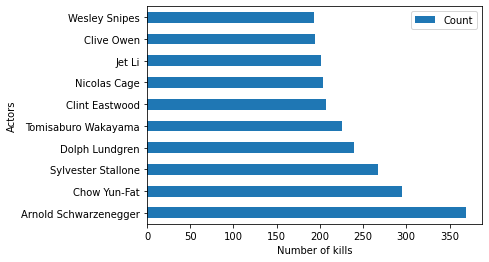

In [12]:
line = df.plot.barh(x = "Actor")
line.set_ylabel("Actors")
line.set_xlabel("Number of kills")

# Question 9

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("roman-emperor-reigns.csv")
df[:5]

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


Text(0, 0.5, 'Cause of death')

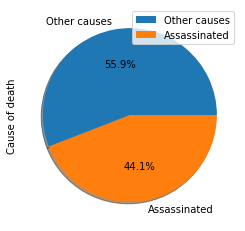

In [21]:
data = df.groupby((df.Cause_of_Death == "Assassinated") | (df.Cause_of_Death == "Possibly assassinated")).count()
data = data.rename({False : 'Other causes', True : 'Assassinated'}) 

pie = data.plot.pie(y = "Cause_of_Death", autopct='%1.1f%%', shadow = True)
pie.set_ylabel("Cause of death")

# Question 10

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
df.columns

Index(['Year', 'Total Arcade Revenue (billions)',
       'Computer Science Doctorates Awarded (US)'],
      dtype='object')

Text(0.5, 0, 'Number of PHDs')

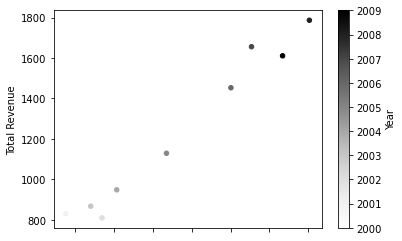

In [9]:
scatter = df.plot.scatter(x = 'Total Arcade Revenue (billions)', y = 'Computer Science Doctorates Awarded (US)', c = 'Year')
scatter.set_ylabel("Total Revenue")
scatter.set_xlabel("Number of PHDs")